<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [208]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [209]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [210]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'preferential_followers', 'preferential_followees',
       'num_followers_s', 'num_followers_d', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'svd_u_dot', 'svd_v_dot'],
      dtype='object

In [211]:
[df_final_test.columns]

[Index(['source_node', 'destination_node', 'indicator_link',
        'jaccard_followers', 'jaccard_followees', 'cosine_followers',
        'cosine_followees', 'preferential_followers', 'preferential_followees',
        'num_followers_s', 'num_followers_d', 'num_followees_s',
        'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
        'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
        'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
        'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
        'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
        'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
        'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
        'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
        'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
        'svd_u_dot', 'svd_v_dot'],
     

In [212]:
df_final_test[:2]

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,preferential_followers,preferential_followees,num_followers_s,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,svd_u_dot,svd_v_dot
0,848424,784690,1,0,0.000000,0.029161,0.000000,84,54,6,...,4.341478e-13,5.535503e-14,-9.994076e-10,5.791914e-10,3.512351e-07,2.486660e-09,2.771131e-09,1.727693e-12,8.425182e-20,2.074679e-17
1,1430179,1505513,1,0,0.018868,0.012790,0.037268,1196,720,26,...,1.687500e-09,1.384238e-11,-2.894121e-09,6.287104e-10,7.944675e-09,7.879851e-12,3.541418e-10,1.034068e-09,1.418923e-17,2.235108e-17


In [213]:
df_final_train[:2]

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,preferential_followers,preferential_followees,num_followers_s,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,svd_u_dot,svd_v_dot
0,273084,1505602,1,0,0.000000,0.000000,0.000000,66,120,11,...,8.108225e-13,1.719703e-14,-1.355368e-12,4.675311e-13,1.128587e-06,6.616704e-14,9.770709e-13,4.160011e-14,1.114952e-11,2.238777e-12
1,34503,437532,1,0,0.044444,0.023538,0.085126,380,552,20,...,8.378452e-13,1.699754e-15,-2.214436e-13,9.290799e-13,5.386456e-11,7.610878e-13,9.617614e-13,1.352244e-15,5.758865e-22,1.567597e-21


In [214]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [215]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9244777718264595 test Score 0.9148350484902386
Estimators =  50 Train Score 0.9209491525423729 test Score 0.8965987263859604
Estimators =  100 Train Score 0.9216242722701 test Score 0.9133385155150318
Estimators =  250 Train Score 0.9219646856607117 test Score 0.9140495521010342
Estimators =  450 Train Score 0.922552535023349 test Score 0.9121404069950967


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

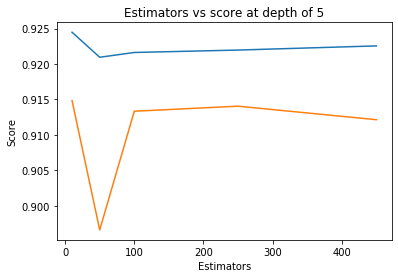

In [216]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8978819419171702 test Score 0.8728383797661737
depth =  9 Train Score 0.9589877747126904 test Score 0.9190582864871718
depth =  11 Train Score 0.9627083586811047 test Score 0.9229862806161099
depth =  15 Train Score 0.9658598777674342 test Score 0.9244093164046077
depth =  20 Train Score 0.9659294680215182 test Score 0.9239384434011916
depth =  35 Train Score 0.9660692394200667 test Score 0.9241748063320984
depth =  50 Train Score 0.9660692394200667 test Score 0.9241748063320984
depth =  70 Train Score 0.9660692394200667 test Score 0.9241748063320984
depth =  130 Train Score 0.9660692394200667 test Score 0.9241748063320984


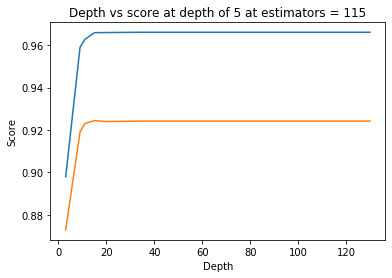

In [217]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [218]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96335645 0.96249632 0.96131595 0.96332554 0.96451004]
mean train scores [0.96452867 0.96385418 0.96205006 0.96439793 0.96595476]


In [219]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [220]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [221]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [222]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9661662149404635
Test f1 score 0.9247017159239429


In [223]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


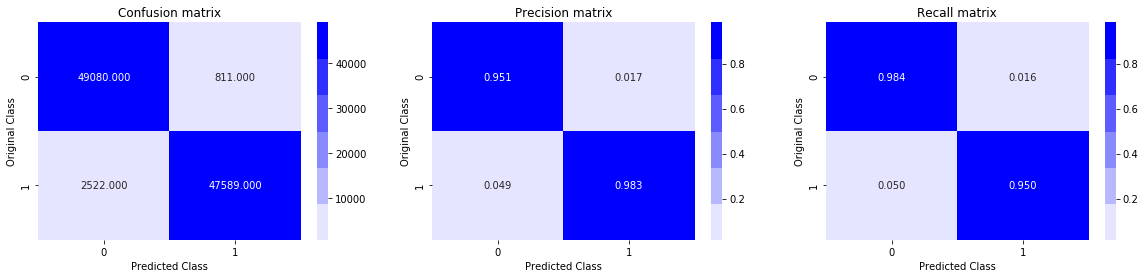

Test confusion_matrix


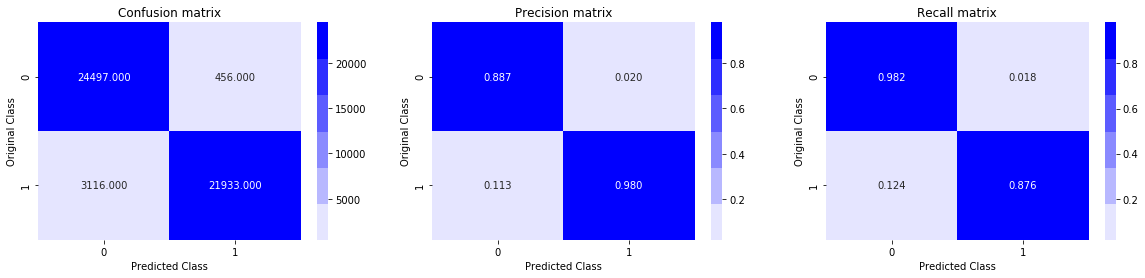

In [224]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

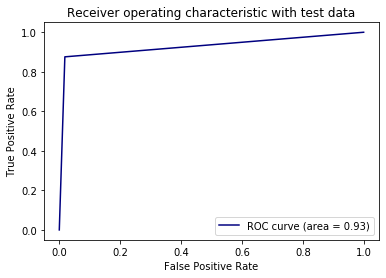

In [225]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

# Assignments:
1. Add another feature called Preferential Attachment with followers and followees data of vertex. you can check about Preferential Attachment in below link http://be.amazd.com/link-prediction/
2. Add feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features. you can read about this in below pdf https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf

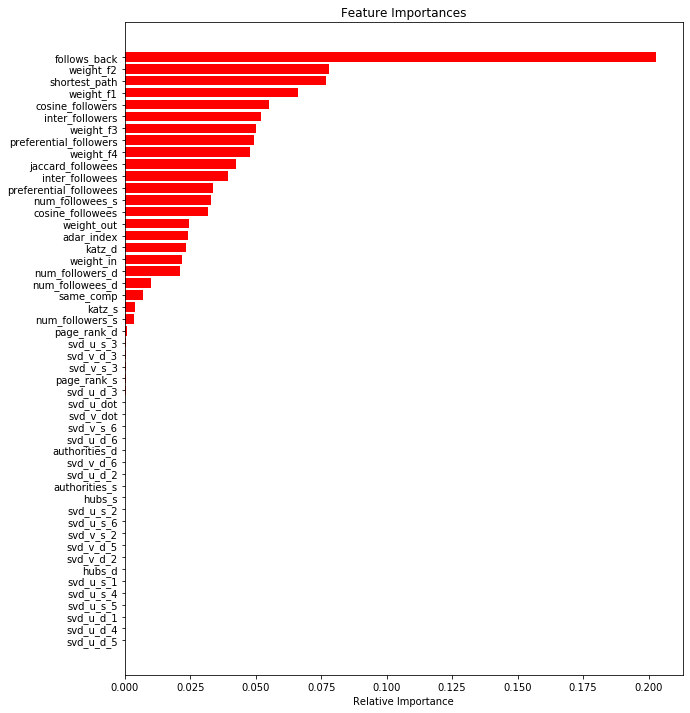

In [226]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-50:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h3>Observation</h3>
1. Preferential Attachment feature is contributing more to classify the data.From above Feature Importance’s graph, we observe that ‘Preferential Attachment followees’ is 8th most important feature and 'Preferential Attachment followers' is is 12th most important feature.

2. svd_U_dot and svd_V_dot is not contributing more to classify the data, adding svd_U_dot and svd_V_dot will not make any difference to model . 


# Assignments:
3. Tune hyperparameters for XG boost with all these features and check the error metric.

In [88]:
%%time
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
params={"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.02] ,
 "max_depth"        : [ 10, 12, 15,30],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.5 , 0.7 ] }
model = XGBClassifier( n_estimators=20,objective= 'binary:logistic',seed=27)
gs=GridSearchCV(estimator=model,cv=3,n_jobs=-1,scoring ='f1',verbose=True,param_grid=params,return_train_score=True)
gs.fit(df_final_train,y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 52.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 74.3min finished


Wall time: 1h 15min 7s


In [142]:
results=pd.DataFrame(gs.cv_results_).sort_values(by='rank_test_score').head(10)
results[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
35,33.982832,6.152647,0.306806,0.092149,0.5,0.1,0.2,30,"{'colsample_bytree': 0.5, 'gamma': 0.1, 'learn...",0.978935,0.978328,0.976785,0.978016,0.000905,1,0.999895,0.999880,0.999880,0.999885,0.000007
135,40.384184,6.151397,0.301608,0.095605,0.7,0.1,0.2,30,"{'colsample_bytree': 0.7, 'gamma': 0.1, 'learn...",0.979030,0.977578,0.977149,0.977919,0.000805,2,0.999895,0.999835,0.999880,0.999870,0.000025
115,45.288573,12.515603,0.364012,0.194985,0.7,0,0.2,30,"{'colsample_bytree': 0.7, 'gamma': 0.0, 'learn...",0.978576,0.977672,0.977415,0.977888,0.000498,3,0.999910,0.999805,0.999850,0.999855,0.000043
15,33.504706,5.045762,0.239206,0.007355,0.5,0,0.2,30,"{'colsample_bytree': 0.5, 'gamma': 0.0, 'learn...",0.979111,0.977992,0.976366,0.977823,0.001127,4,0.999880,0.999865,0.999880,0.999875,0.000007
195,47.595830,16.469172,0.296400,0.099483,0.7,0.4,0.2,30,"{'colsample_bytree': 0.7, 'gamma': 0.4, 'learn...",0.978333,0.977559,0.977358,0.977750,0.000420,5,0.999850,0.999745,0.999835,0.999810,0.000046


In [87]:
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)
rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.98006925 0.97992082 0.98016907 0.98021713 0.98020208]
mean train scores [0.99991452 0.99733644 0.99463998 0.9987041  0.99995893]


Train confusion_matrix


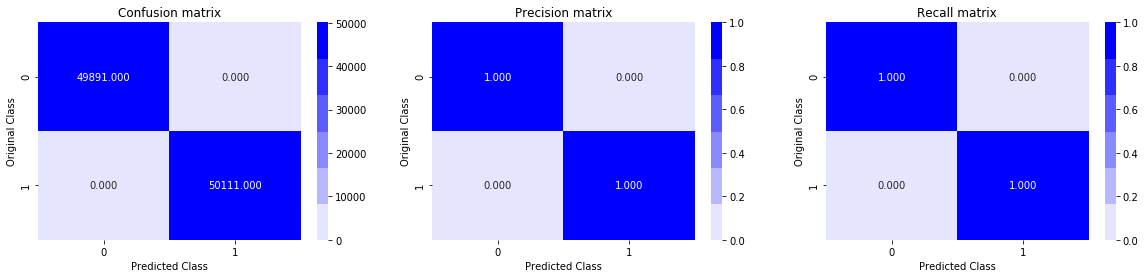

Test confusion_matrix


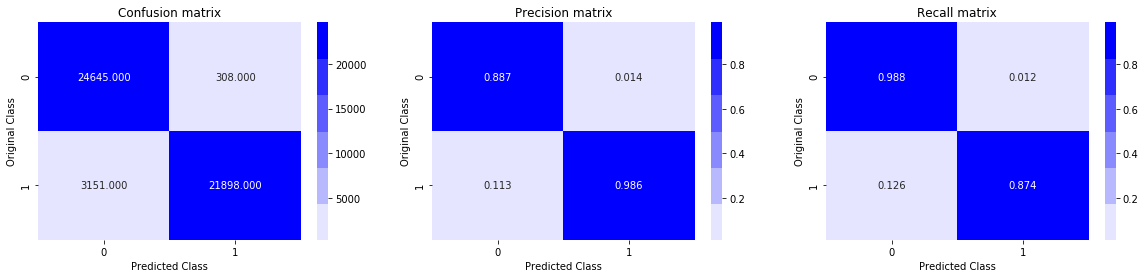

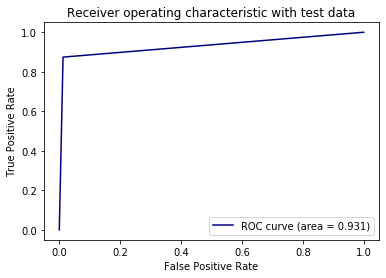

In [227]:
model = XGBClassifier( objective= 'binary:logistic',seed=27,max_depth= 40, min_samples_split=125,min_samples_leaf= 51, n_estimators= 117,colsample_bytree=0.7,gamma=0.1,learning_rate=0.2)
model.fit(df_final_train,y_train)
y_train_pred = model.predict(df_final_train)
y_test_pred = model.predict(df_final_test)
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.3f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()
